# Vehicle Detection Workbook

In this project, your goal is to write a software pipeline to identify vehicles in a video from a front-facing camera on a car. The test images and project video are available in the project repository. There is an writeup template in the repostitory provided as a starting point for your writeup of the project.

Once you have completed your project, double check the [Project Rubric](https://review.udacity.com/#!/rubrics/513/view) to make sure you have addressed all the rubric points. Your project will be evaluated by a Udacity reviewer according to that same rubric.


## Goal(Writeup)

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.


## Import Everything

**Note that this Jupyter Notebook as submodules in src folder. Those imports are done whenever we need those**

In [50]:
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
from scipy.ndimage.measurements import label
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import numpy as np
import pickle
import cv2
import glob
import time

import scipy
import collections
import math

%matplotlib inline

#auto reloading the submodules in Jupyter Notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Getting hang of Data
I got the data from [Vehicle Image Database](http://www.gti.ssr.upm.es/~jal/download.html). That is added to other repo called [DataSets](https://github.com/kinshuk4/DataSets/tree/master/carnd-vehicle-detection-p5-data/data). The data is located on my system at "../DataSets/carnd-vehicle-detection-p5-data/data/".


In [51]:
data_url="http://www.gti.ssr.upm.es/~jal/download.html"
data_folder_ids = [1,2]
data_folder="../DataSets/carnd-vehicle-detection-p5-data/data"


### Downloading data

### Read the data

In [52]:
vehicle_files=[]
non_vehicle_files=[]
for data_folder_id in data_folder_ids:
    new_data_folder_path=data_folder+str(data_folder_id)+"/"
    print(new_data_folder_path)
    vehicle_files_curr = glob.glob(new_data_folder_path + 'vehicles/**/*.png', recursive=True)
    non_vehicle_files_curr = glob.glob(new_data_folder_path + 'non-vehicles/**/*.png', recursive=True)
    
    print('Current Total Vehicle and non Vehicle files : {} and {} '.format(len(vehicle_files_curr), len(non_vehicle_files_curr)))
    
    vehicle_files.extend(vehicle_files_curr)
    non_vehicle_files.extend(non_vehicle_files_curr)

print('Total Vehicle and non Vehicle files : {} and {} '.format(len(vehicle_files), len(non_vehicle_files)))

../DataSets/carnd-vehicle-detection-p5-data/data1/
Current Total Vehicle and non Vehicle files : 3425 and 3900 
../DataSets/carnd-vehicle-detection-p5-data/data2/
Current Total Vehicle and non Vehicle files : 8792 and 8968 
Total Vehicle and non Vehicle files : 12217 and 12868 


## Histogram of Orientated Gradients (HOG)

### Extracting features
** Whole extraction related code is placed in src.feature_extractor**

In [53]:
import src.feature_extractor as fext

## Train the Classifier

In [54]:
p5u.download_data_one(data_url, data_folder)

NameError: name 'p5u' is not defined

#### Define whole classifier
Refer src.preprocessing_classifier.

In [55]:
from  src.preprocessing_classifier import PreProcessingClassifier

#### Initiate the classifier

In [56]:
classifier = PreProcessingClassifier()

#### Train the Classifier

In [57]:
skip_training=False
if not skip_training:
    classifier.train(vehicle_files, non_vehicle_files)

  0%|          | 2/12217 [00:00<19:24, 10.49it/s]

Extracting the features....


100%|██████████| 12868/12868 [03:23<00:00, 93.83it/s] 


Features extracted.
Training complete


#### Check Accuracy

In [49]:
if not skip_training:
    classifier.test(n_predict=15)

ACCURACY:      0.9956
SVC PREDICTS:  [ 1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.]
LABELS:        [ 1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.]


#### Dumping the data

In [19]:
model_file = "./data/classif.p"
scaler_file="./data/scaler.p"


In [20]:
if not skip_training:
    classifier.dump(model_file, scaler_file)

Starting the dump
Ending the dump


#### Get the Trained SVC

In [21]:
svc_trained, xscaler = classifier.get(model_file, scaler_file)

## DETECTION FUNCTIONS

In [22]:
import src.heat_mapper as hmp

## Setting up the Pipeine

In [23]:
import src.pipeline as pp

### Image Pipeline

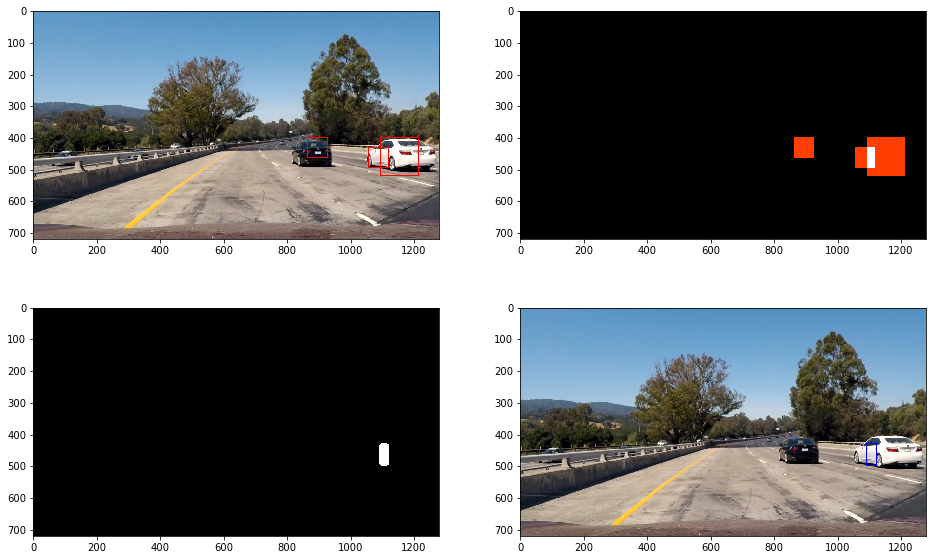

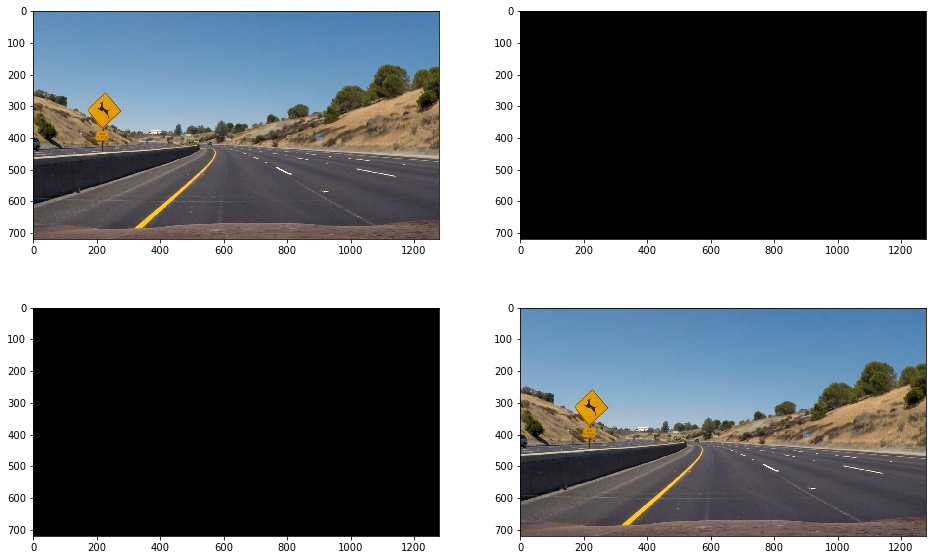

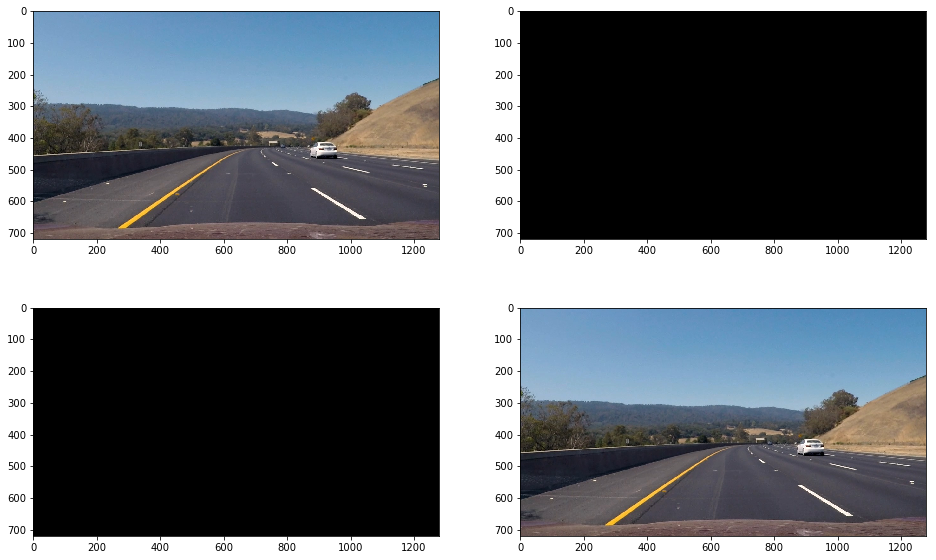

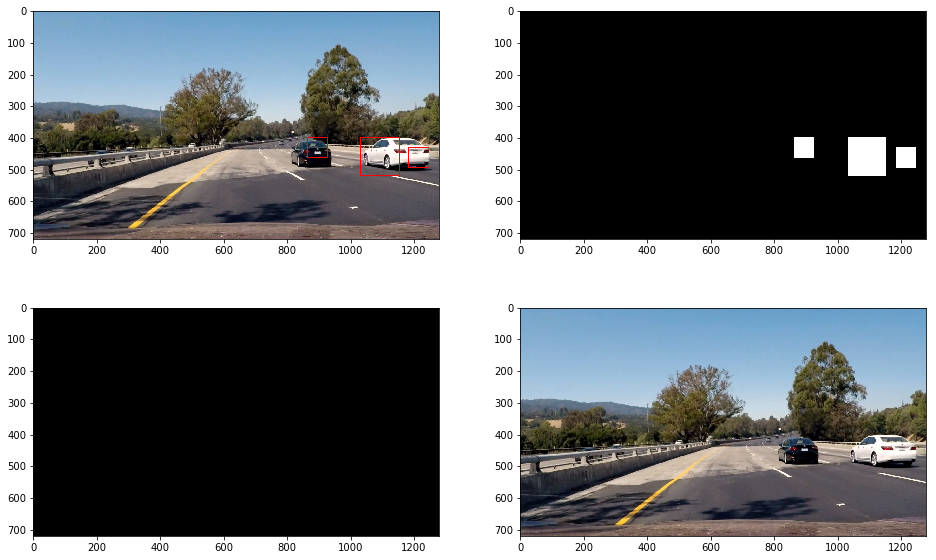

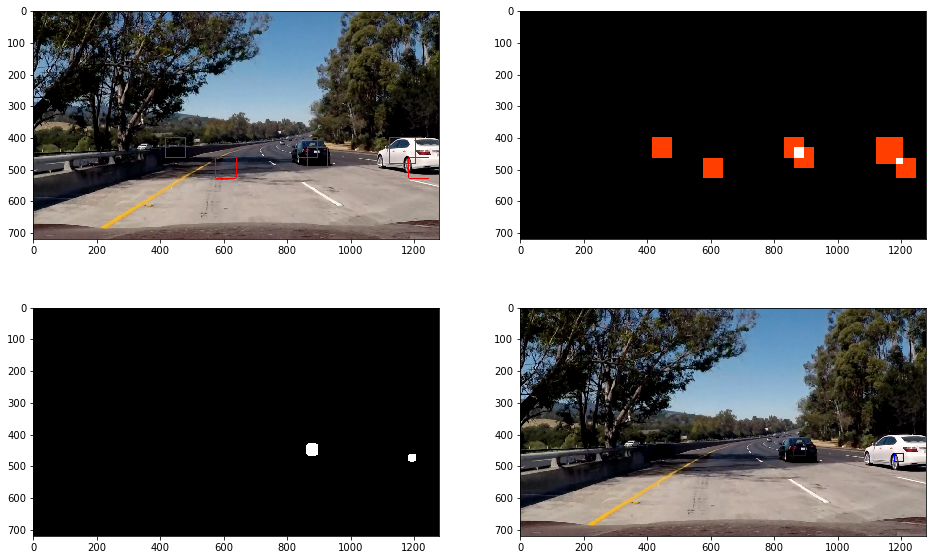

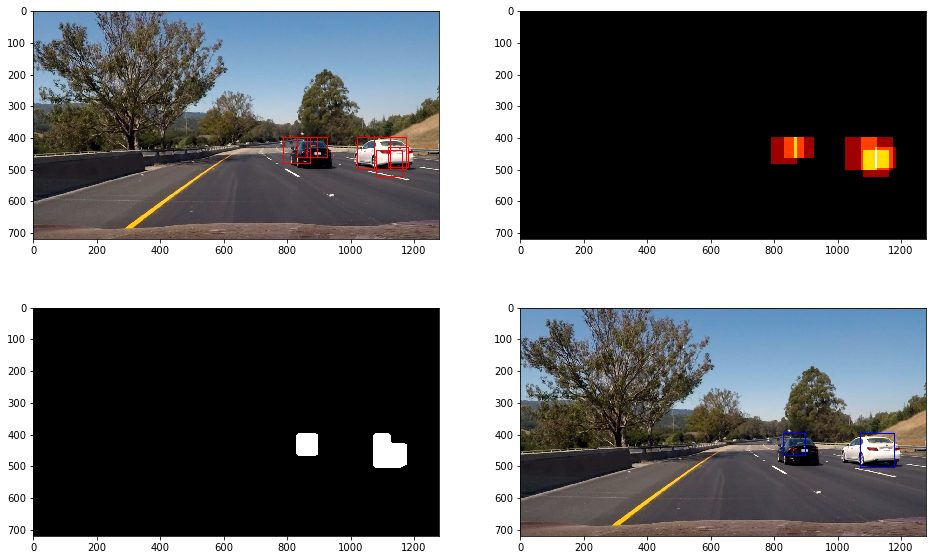

In [24]:
test_image_folder = "./test_images/test*.jpg"
test_images = glob.glob(test_image_folder)
for test_image_file in test_images:
    test_image = cv2.imread(test_image_file)
    pp.pipeline(test_image, svc=svc_trained, scaler=xscaler, keep_state=False, verbose=True)


### Video Pipeline

In [25]:
%time pp.video_pipeline(svc=svc_trained, scaler=xscaler, keep_state=True, verbose=False)


CPU times: user 38min 51s, sys: 1min 27s, total: 40min 18s
Wall time: 30min 48s
